<a href="https://colab.research.google.com/github/mandalarotation/PixdosepiX-OpenKBP---2020-AAPM-Grand-Challenge-/blob/master/ML_sololearn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("https://sololearn.com/uploads/files/titanic.csv")

In [32]:
df["male"] = df["Sex"] == "male"
X = df[["Pclass", "male", "Age", "Siblings/Spouses", "Parents/Children", "Fare"]].values
y = df["Survived"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5) #Apply a random state (seed) attribute to get the same split
print("whole dataset: ", X.shape, y.shape)
print("training set: ", X_train.shape, y_train.shape)
print("test set: ", X_test.shape, y_test.shape)



whole dataset:  (887, 6) (887,)
training set:  (665, 6) (665,)
test set:  (222, 6) (222,)


In [ ]:
model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)

In [11]:
print("accuracy: ", accuracy_score(y, y_pred))
print("precision: ", precision_score(y, y_pred))
print("recall: ", recall_score(y, y_pred))
print("f1 score: ", f1_score(y, y_pred))

accuracy:  0.8049605411499436
precision:  0.7734627831715211
recall:  0.6988304093567251
f1 score:  0.7342549923195083


In [13]:
print(confusion_matrix(y, y_pred))

[[475  70]
 [103 239]]


In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
print(model.score(X_test, y_test))


0.7837837837837838


In [22]:
print("accuracy: ", accuracy_score(y_test, y_pred2))
print("precision: ", precision_score(y_test, y_pred2))
print("recall: ", recall_score(y_test, y_pred2))
print("f1 score: ", f1_score(y_test, y_pred2))

accuracy:  0.7837837837837838
precision:  0.7702702702702703
recall:  0.6477272727272727
f1 score:  0.7037037037037036


In [31]:
sensitivity_score = recall_score
from sklearn.metrics import precision_recall_fscore_support
print("Sensitivity: ", sensitivity_score(y_test, y_pred2))
print(precision_recall_fscore_support(y_test, y_pred2)[1])

Sensitivity:  0.6477272727272727
[0.87313433 0.64772727]


In [42]:
y_pred_proba = model.predict_proba(X_test)
y_pred3 = y_pred_proba > 0.75
y_pred3

array([[False, False],
       [ True, False],
       [False,  True],
       [False, False],
       [False, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False, False],
       [ True, False],
       [False,  True],
       [False, False],
       [False,  True],
       [ True, False],
       [False, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False, False],
       [False, False],
       [ True, False],
       [False,  True],
       [False, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False, False],
       [False, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False, False],
       [Fal

In [36]:
print("accuracy: ", accuracy_score(y_test, y_pred3))
print("precision: ", precision_score(y_test, y_pred3))
print("recall: ", recall_score(y_test, y_pred3))
print("f1 score: ", f1_score(y_test, y_pred3))

accuracy:  0.7837837837837838
precision:  0.925
recall:  0.45121951219512196
f1 score:  0.6065573770491803


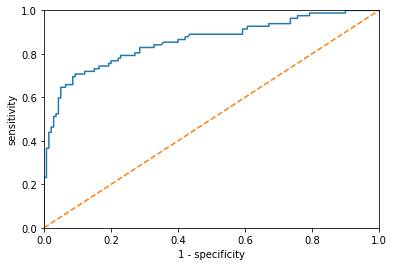

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("1 - specificity")
plt.ylabel("sensitivity")
plt.show()

In [45]:
(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8576655052264808